# Intersecting DGE-tables with text-mined *Ref-genes* in **wheat** using `UpsetR`
## Import and prepare data

In [33]:
library(UpSetR, warn.conflicts = FALSE)
library(tidyverse, warn.conflicts = FALSE)
library(cowplot, warn.conflicts = FALSE)
library(RColorBrewer, warn.conflicts = FALSE)
library(pheatmap, warn.conflicts = FALSE)

In [2]:
# import refgenes table
setwd("/nfs/pgsb/projects/comparative_triticeae/phenotype/flower_development/refgenes/translation2current_versions/")
refgenes_subfam <- read.table("two_times_filtered.subfamilies.tsv", header = TRUE, sep = "\t", stringsAsFactors = FALSE)
# this table needs fill = TRUE because of missing values from family etc
refgenes_full <- read.table("two_times_filtered.mapped_to_respective_genome_annotation.tsv", header = TRUE, sep = "\t", fill = TRUE, stringsAsFactors = FALSE)
glimpse(refgenes_subfam)
#glimpse(refgenes_full)

Rows: 3,794
Columns: 4
$ Entry      <chr> "Q6RX92", "Q10464", "Q5BHR8", "P33432", "Q6RX92", "B6Z279"…
$ subfamily  <chr> NA, NA, NA, NA, NA, NA, NA, NA, "OG0000838.1", "OG0000838.…
$ taxon      <chr> "Triticum_aestivum_D", "Triticum_aestivum_D", "Triticum_ae…
$ display_id <chr> "TraesCHI1D01G355100.1", "TraesCHI5D01G005000.1", "TraesCH…


In [3]:
# import barley DEGs tables of 0.01 cutoff
# this is all for WHEAT!!
setwd("/nfs/pgsb/projects/comparative_triticeae/phenotype/flower_development/refsets/triticum/")
flower1_barley <- read.table("deg_wheat_flower1_signif0_01.csv", header = TRUE, sep = ",", stringsAsFactors = FALSE)
id_f1_b <- flower1_barley$target_id
flower2_barley <- read.table("deg_wheat_flower2_signif0_01.csv", header = TRUE, sep = ",", stringsAsFactors = FALSE)
id_f2_b <- flower2_barley$target_id
flower3_barley <- read.table("deg_wheat_flower3_signif0_01.csv", header = TRUE, sep = ",", stringsAsFactors = FALSE)
id_f3_b <- flower3_barley$target_id
flower4_barley <- read.table("deg_wheat_flower4_signif0_01.csv", header = TRUE, sep = ",", stringsAsFactors = FALSE)
id_f4_b <- flower4_barley$target_id
flower5_barley <- read.table("deg_wheat_flower5_signif0_01.csv", header = TRUE, sep = ",", stringsAsFactors = FALSE)
id_f5_b <- flower5_barley$target_id
anther1_barley <- read.table("deg_wheat_anther1_signif0_01.csv", header = TRUE, sep = ",", stringsAsFactors = FALSE)
id_a1_b <- anther1_barley$target_id
anther2_barley <- read.table("deg_wheat_anther2_signif0_01.csv", header = TRUE, sep = ",", stringsAsFactors = FALSE)
id_a2_b <- anther2_barley$target_id
glimpse(flower1_barley)
glimpse(id_f1_b)

Rows: 9,853
Columns: 12
$ target_id       <chr> "TraesCHI6B01G160800", "TraesCHI5A01G248900", "TraesC…
$ pval            <dbl> 3.215407e-29, 2.123664e-21, 4.155607e-21, 1.144995e-2…
$ qval            <dbl> 1.952427e-24, 6.447549e-17, 8.411087e-17, 1.738131e-1…
$ test_stat       <dbl> 125.91129, 90.22680, 88.89868, 86.89394, 82.93743, 82…
$ rss             <dbl> 62.17447, 25.04654, 415.90043, 62.24492, 66.63289, 31…
$ degrees_free    <int> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,…
$ mean_obs        <dbl> 5.396701, 6.604458, 2.132492, 5.978212, 5.618846, 2.4…
$ var_obs         <dbl> 1.2682467, 0.3490862, 5.7161447, 0.8467173, 1.0773142…
$ tech_var        <dbl> 0.026799890, 0.002060421, 0.164240379, 0.009091378, 0…
$ sigma_sq        <dbl> 0.2920436, 0.1263834, 1.9685824, 0.3101133, 0.3317100…
$ smooth_sigma_sq <dbl> 0.10615313, 0.08240387, 0.61016308, 0.08868084, 0.097…
$ final_sigma_sq  <dbl> 0.2920436, 0.1263834, 1.9685824, 0.3101133, 0.3317100…
 chr [1:9853] "TraesCHI6B01G

In [4]:
# import barley DEGs tables of 0.05 cutoff
# this is all for WHEAT!!
setwd("/nfs/pgsb/projects/comparative_triticeae/phenotype/flower_development/refsets/triticum/")
flower1_barley_05 <- read.table("deg_wheat_flower1_signif0_05.csv", header = TRUE, sep = ",", stringsAsFactors = FALSE)
id_f1_b_05 <- flower1_barley_05$target_id
flower2_barley_05 <- read.table("deg_wheat_flower2_signif0_05.csv", header = TRUE, sep = ",", stringsAsFactors = FALSE)
id_f2_b_05 <- flower2_barley_05$target_id
flower3_barley_05 <- read.table("deg_wheat_flower3_signif0_05.csv", header = TRUE, sep = ",", stringsAsFactors = FALSE)
id_f3_b_05 <- flower3_barley_05$target_id
flower4_barley_05 <- read.table("deg_wheat_flower4_signif0_05.csv", header = TRUE, sep = ",", stringsAsFactors = FALSE)
id_f4_b_05 <- flower4_barley_05$target_id
flower5_barley_05 <- read.table("deg_wheat_flower5_signif0_05.csv", header = TRUE, sep = ",", stringsAsFactors = FALSE)
id_f5_b_05 <- flower5_barley_05$target_id
anther1_barley_05 <- read.table("deg_wheat_anther1_signif0_05.csv", header = TRUE, sep = ",", stringsAsFactors = FALSE)
id_a1_b_05 <- anther1_barley_05$target_id
anther2_barley_05 <- read.table("deg_wheat_anther2_signif0_05.csv", header = TRUE, sep = ",", stringsAsFactors = FALSE)
id_a2_b_05 <- anther2_barley_05$target_id
glimpse(flower1_barley_05)
glimpse(id_f1_b_05)

Rows: 17,793
Columns: 12
$ target_id       <chr> "TraesCHI6B01G160800", "TraesCHI5A01G248900", "TraesC…
$ pval            <dbl> 3.215407e-29, 2.123664e-21, 4.155607e-21, 1.144995e-2…
$ qval            <dbl> 1.952427e-24, 6.447549e-17, 8.411087e-17, 1.738131e-1…
$ test_stat       <dbl> 125.91129, 90.22680, 88.89868, 86.89394, 82.93743, 82…
$ rss             <dbl> 62.17447, 25.04654, 415.90043, 62.24492, 66.63289, 31…
$ degrees_free    <int> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,…
$ mean_obs        <dbl> 5.396701, 6.604458, 2.132492, 5.978212, 5.618846, 2.4…
$ var_obs         <dbl> 1.2682467, 0.3490862, 5.7161447, 0.8467173, 1.0773142…
$ tech_var        <dbl> 0.026799890, 0.002060421, 0.164240379, 0.009091378, 0…
$ sigma_sq        <dbl> 0.2920436, 0.1263834, 1.9685824, 0.3101133, 0.3317100…
$ smooth_sigma_sq <dbl> 0.10615313, 0.08240387, 0.61016308, 0.08868084, 0.097…
$ final_sigma_sq  <dbl> 0.2920436, 0.1263834, 1.9685824, 0.3101133, 0.3317100…
 chr [1:17793] "TraesCHI6B0

In [5]:
# import barley DEGs tables of 0.1 cutoff
# this is all for WHEAT!!
setwd("/nfs/pgsb/projects/comparative_triticeae/phenotype/flower_development/refsets/triticum/")
flower1_barley_1 <- read.table("deg_wheat_flower1_signif0_1.csv", header = TRUE, sep = ",", stringsAsFactors = FALSE)
id_f1_b_1 <- flower1_barley_1$target_id
flower2_barley_1 <- read.table("deg_wheat_flower2_signif0_1.csv", header = TRUE, sep = ",", stringsAsFactors = FALSE)
id_f2_b_1 <- flower2_barley_1$target_id
flower3_barley_1 <- read.table("deg_wheat_flower3_signif0_1.csv", header = TRUE, sep = ",", stringsAsFactors = FALSE)
id_f3_b_1 <- flower3_barley_1$target_id
flower4_barley_1 <- read.table("deg_wheat_flower4_signif0_1.csv", header = TRUE, sep = ",", stringsAsFactors = FALSE)
id_f4_b_1 <- flower4_barley_1$target_id
flower5_barley_1 <- read.table("deg_wheat_flower5_signif0_1.csv", header = TRUE, sep = ",", stringsAsFactors = FALSE)
id_f5_b_1 <- flower5_barley_1$target_id
anther1_barley_1 <- read.table("deg_wheat_anther1_signif0_1.csv", header = TRUE, sep = ",", stringsAsFactors = FALSE)
id_a1_b_1 <- anther1_barley_1$target_id
anther2_barley_1 <- read.table("deg_wheat_anther2_signif0_1.csv", header = TRUE, sep = ",", stringsAsFactors = FALSE)
id_a2_b_1 <- anther2_barley_1$target_id
glimpse(flower4_barley_1)

Rows: 12,401
Columns: 12
$ target_id       <chr> "TraesCHI3A01G583100", "TraesCHI3D01G589700", "TraesC…
$ pval            <dbl> 1.624254e-24, 4.381100e-20, 1.083177e-18, 1.079180e-1…
$ qval            <dbl> 9.879850e-20, 1.332446e-15, 1.647160e-14, 1.647160e-1…
$ test_stat       <dbl> 104.43513, 84.24047, 77.90134, 77.90865, 75.40566, 74…
$ rss             <dbl> 163.91574, 132.21329, 54.72985, 109.11992, 114.28875,…
$ degrees_free    <int> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,…
$ mean_obs        <dbl> 4.914588, 4.281714, 6.083402, 4.506084, 4.349555, 5.7…
$ var_obs         <dbl> 2.9024929, 2.9675889, 1.4999785, 4.2207954, 3.3998067…
$ tech_var        <dbl> 0.029147741, 0.043895617, 0.027027051, 0.099160790, 0…
$ sigma_sq        <dbl> 0.98896246, 0.77730493, 0.31290991, 0.57860271, 0.640…
$ smooth_sigma_sq <dbl> 0.10735003, 0.16104523, 0.07065360, 0.13804447, 0.153…
$ final_sigma_sq  <dbl> 0.98896246, 0.77730493, 0.31290991, 0.57860271, 0.640…


## Check for barley refgenes vs barley genes overlap

In [8]:
# load tx2gene object for mRNA mapping information
setwd("/nfs/pgsb/projects/comparative_triticeae/phenotype/flower_development/refsets/triticum/")
m <- read.delim("wheat_tx2gene.tsv",stringsAsFactors=FALSE)
colnames(m) <- c("target_id", "gene")
glimpse(m)
# extract target_id
m1 <- as.data.frame(m$target_id, stringsAsFactors = FALSE)
colnames(m1) <- c("target_id")
glimpse(m1)
# extract gene names
m2 <- m$gene
glimpse(m2)

Rows: 123,075
Columns: 2
$ target_id <chr> "TraesCHI1A01G000600.1", "TraesCHI1A01G000800.1", "TraesCHI…
$ gene      <chr> "TraesCHI1A01G000600", "TraesCHI1A01G000800", "TraesCHI1A01…
Rows: 123,075
Columns: 1
$ target_id <chr> "TraesCHI1A01G000600.1", "TraesCHI1A01G000800.1", "TraesCHI…
 chr [1:123075] "TraesCHI1A01G000600" "TraesCHI1A01G000800" ...


In [9]:
# extract target_id from text mined refgenes table
b_targetid <- as.data.frame(refgenes_subfam$display_id, stringsAsFactors = FALSE)
colnames(b_targetid) <- c("target_id")
glimpse(b_targetid)

Rows: 3,794
Columns: 1
$ target_id <chr> "TraesCHI1D01G355100.1", "TraesCHI5D01G005000.1", "TraesCHI…


In [10]:
# joining two tables with duplicates remaining -> 940 rows
intersect_bj <- inner_join(b_targetid, m1, by = "target_id")
glimpse(intersect_bj)
# intersection with duplicates removed -> 454 rows
intersect_b <- intersect(b_targetid, m1)
glimpse(intersect_b)

Rows: 940
Columns: 1
$ target_id <chr> "TraesCHI1D01G355100.1", "TraesCHI5D01G005000.1", "TraesCHI…
Rows: 454
Columns: 1
$ target_id <chr> "TraesCHI1D01G355100.1", "TraesCHI5D01G005000.1", "TraesCHI…


## Translate Refgenes's `display_id` into `gene_id`

In [11]:
# join intersected deduplicated table with original barley reference genome gene-table
trans <- inner_join(intersect_b, m, by = "target_id")
glimpse(trans)
# extract gene_ids into a vector for upsetr intersections
ref_trit <- trans$gene
glimpse(ref_trit)

Rows: 454
Columns: 2
$ target_id <chr> "TraesCHI1D01G355100.1", "TraesCHI5D01G005000.1", "TraesCHI…
$ gene      <chr> "TraesCHI1D01G355100", "TraesCHI5D01G005000", "TraesCHI1D01…
 chr [1:454] "TraesCHI1D01G355100" "TraesCHI5D01G005000" ...


# UpsetR intersections of DEGs & reference genes

In [14]:
# build upset object for barley with qval <= 0.01
listInput_b <- list(ref_trit, id_f1_b, id_f2_b, id_f3_b, id_f4_b, id_f5_b, id_a1_b, id_a2_b)
u_b <- fromList(listInput_b)
colnames(u_b) <- c("Refgenes wheat", "Flower vs All & Repro", "Flower vs All", "Flower vs All & Zadok", "Prim vs Flowering, +leaf", "Prim vs Flowering, flower", "Anther vs Flower", "Anther wt vs mutant")
str(u_b)

'data.frame':	61995 obs. of  8 variables:
 $ Refgenes wheat           : int  1 1 1 1 1 1 1 1 1 1 ...
 $ Flower vs All & Repro    : int  0 0 0 0 0 0 0 0 1 0 ...
 $ Flower vs All            : int  0 0 0 1 1 1 1 1 1 0 ...
 $ Flower vs All & Zadok    : int  0 0 0 1 1 1 1 1 1 0 ...
 $ Prim vs Flowering, +leaf : int  0 0 0 1 1 1 0 1 1 0 ...
 $ Prim vs Flowering, flower: int  0 0 0 1 0 0 0 0 0 0 ...
 $ Anther vs Flower         : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Anther wt vs mutant      : int  0 0 0 0 1 0 0 1 0 0 ...


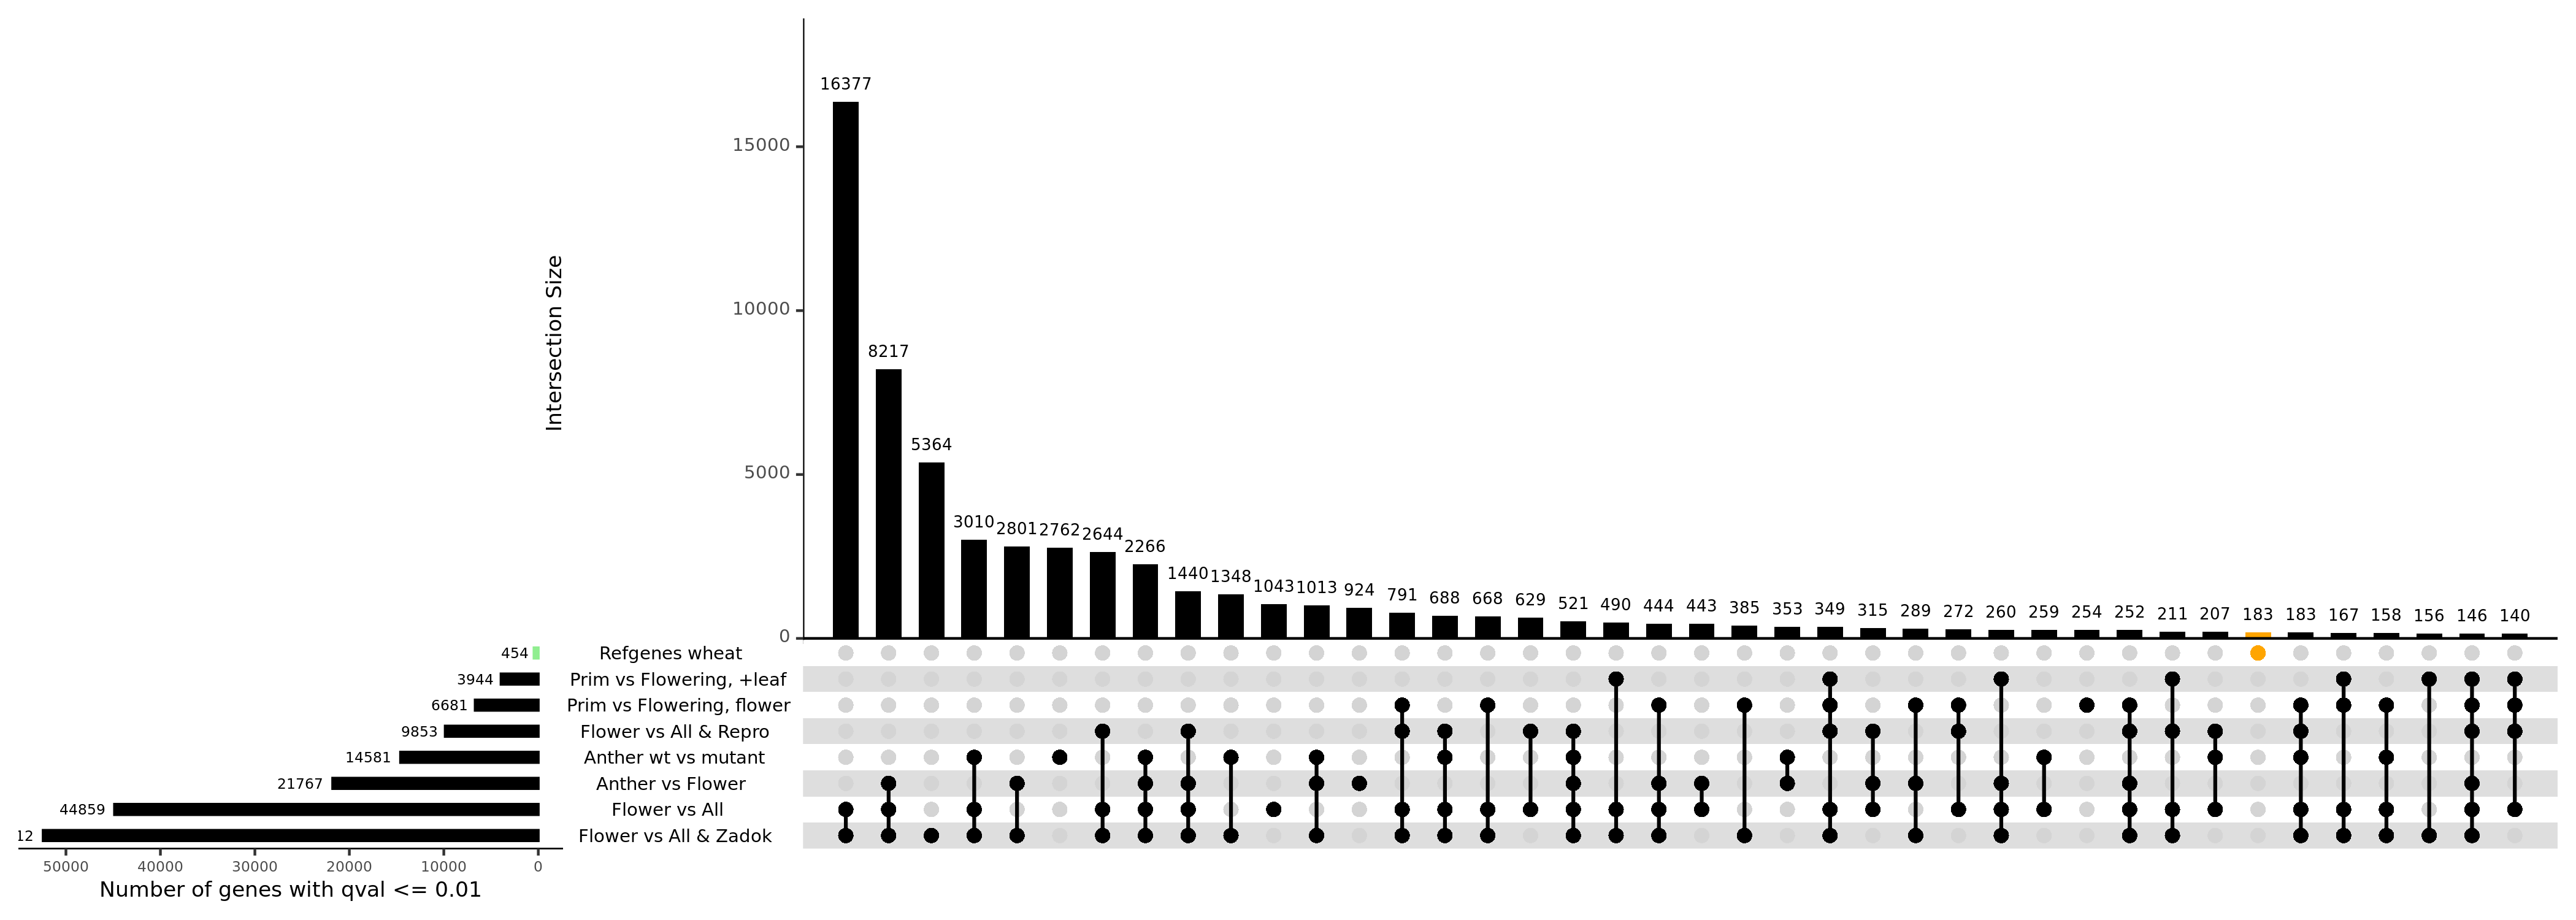

In [21]:
#display all options
options(repr.plot.width = 14, repr.plot.height = 5, repr.plot.res = 300)
p1 <- upset(u_b, sets = c("Refgenes wheat", "Flower vs All & Repro", "Flower vs All", "Flower vs All & Zadok", "Prim vs Flowering, +leaf", "Prim vs Flowering, flower", "Anther vs Flower", "Anther wt vs mutant"), nintersects = 40,
      order.by = "freq", main.bar.color = "black", matrix.color = "black", shade.color = "lightgrey", sets.bar.color =c("black", "black", "black", "black", "black", "black", "black", "lightgreen"), 
      matrix.dot.alpha = 30, shade.alpha = 0.75, set_size.show = T, text.scale = c(1, 1, 1, 0.8, 1, 1), point.size = 2.5,
      queries = list(list(query = intersects, params = list("Refgenes wheat"), color = "orange", active = T)),
      mainbar.y.label = "Intersection Size", sets.x.label = "Number of genes with qval <= 0.01")
p1

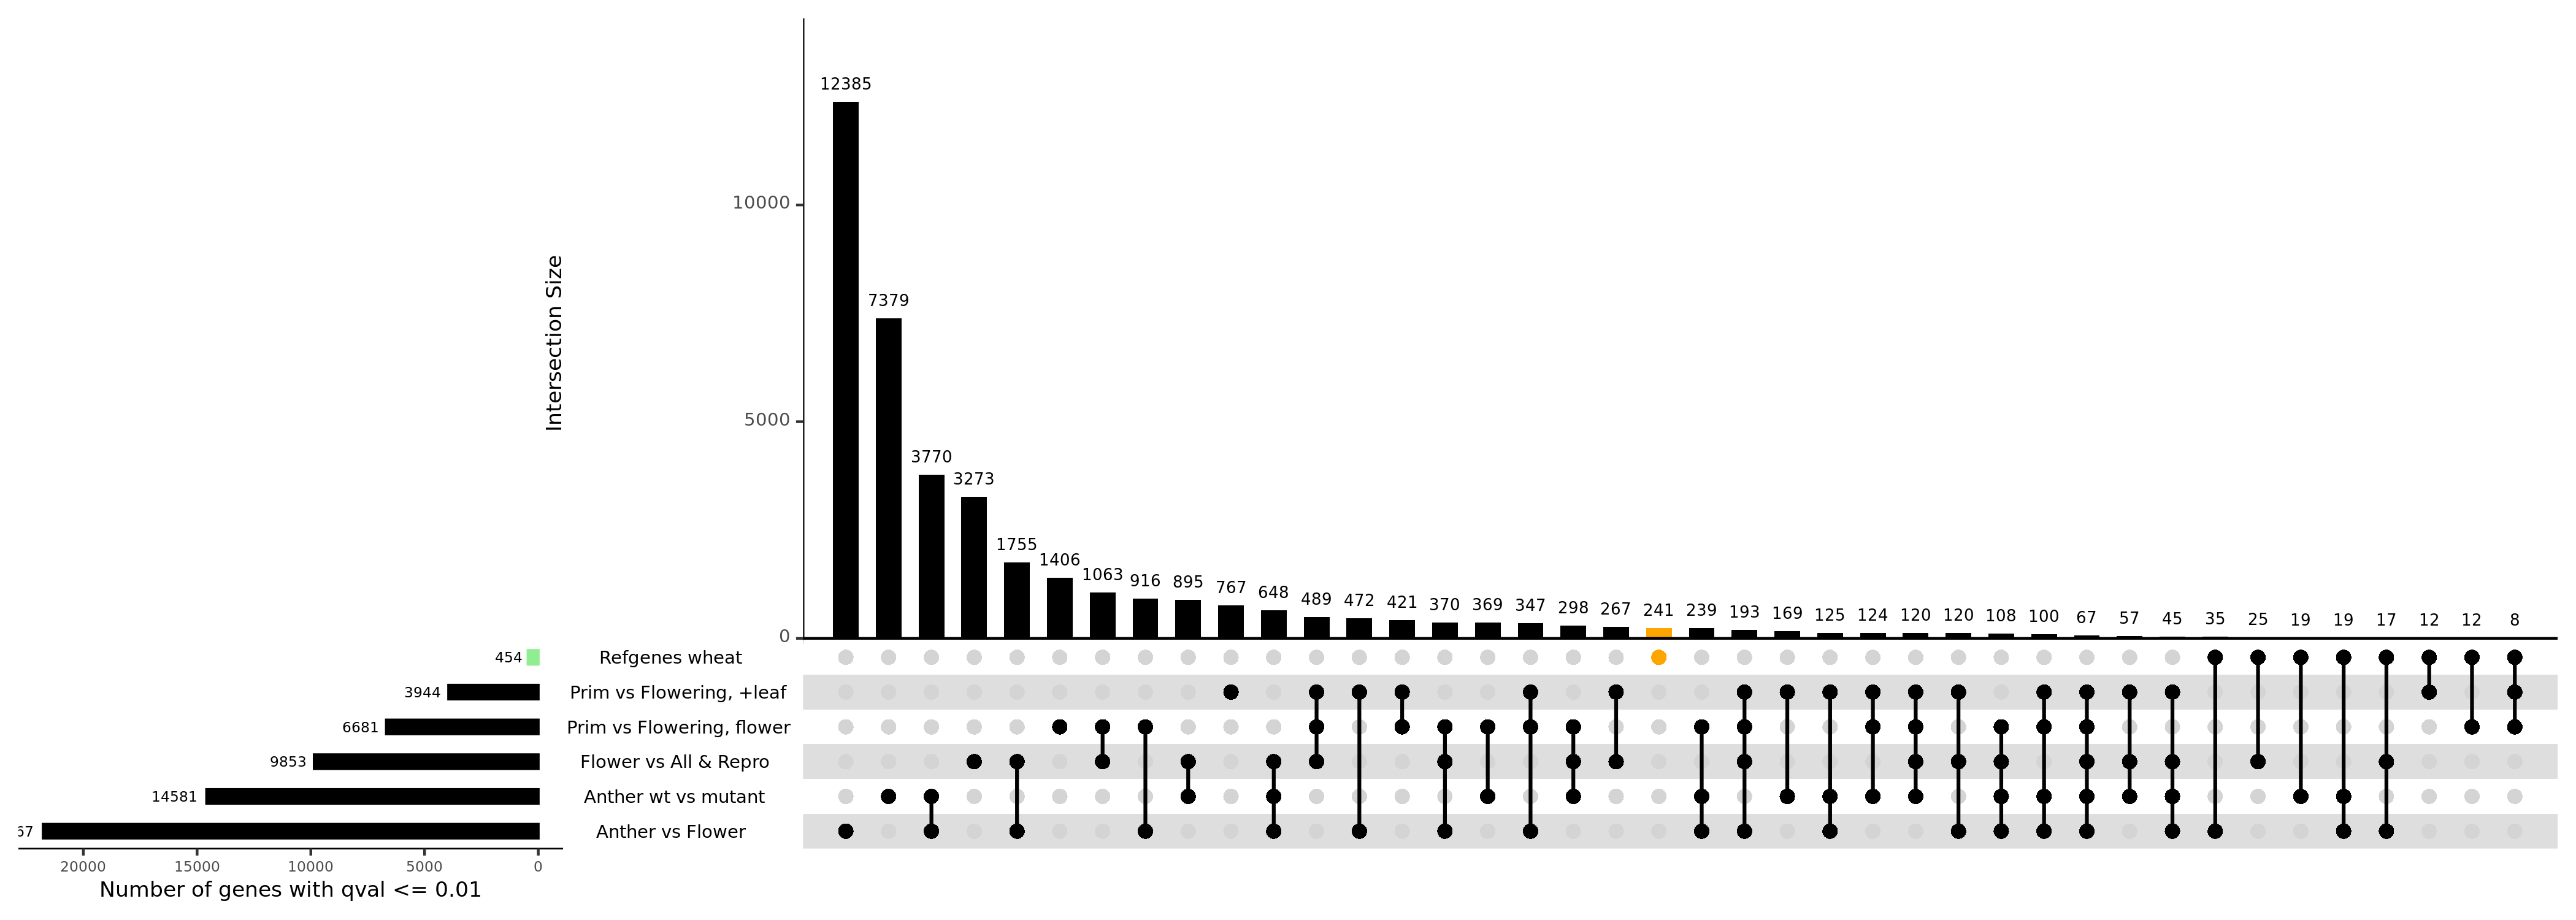

In [29]:
#display selected options
options(repr.plot.width = 14, repr.plot.height = 5, repr.plot.res = 300)
p11 <- upset(u_b, sets = c("Refgenes wheat", "Flower vs All & Repro", "Prim vs Flowering, +leaf", "Prim vs Flowering, flower", "Anther vs Flower", "Anther wt vs mutant"), nintersects = 40,
      order.by = "freq", main.bar.color = "black", matrix.color = "black", shade.color = "lightgrey", sets.bar.color =c("black", "black", "black", "black", "black", "lightgreen"), 
      matrix.dot.alpha = 30, shade.alpha = 0.75, set_size.show = T, text.scale = c(1, 1, 1, 0.8, 1, 1), point.size = 2.5,
      queries = list(list(query = intersects, params = list("Refgenes wheat"), color = "orange", active = T)),
      mainbar.y.label = "Intersection Size", sets.x.label = "Number of genes with qval <= 0.01")
p11

In [22]:
# build upset object for barley with qval <= 0.05
listInput_b <- list(ref_trit, id_f1_b_05, id_f2_b_05, id_f3_b_05, id_f4_b_05, id_f5_b_05, id_a1_b_05, id_a2_b_05)
u_b_05 <- fromList(listInput_b)
colnames(u_b_05) <- c("Refgenes wheat", "Flower vs All & Repro", "Flower vs All", "Flower vs All & Zadok", "Prim vs Flowering, +leaf", "Prim vs Flowering, flower", "Anther vs Flower", "Anther wt vs mutant")
str(u_b_05)

'data.frame':	64392 obs. of  8 variables:
 $ Refgenes wheat           : int  1 1 1 1 1 1 1 1 1 1 ...
 $ Flower vs All & Repro    : int  0 0 0 0 1 1 1 1 1 0 ...
 $ Flower vs All            : int  0 0 0 1 1 1 1 1 1 0 ...
 $ Flower vs All & Zadok    : int  0 0 0 1 1 1 1 1 1 0 ...
 $ Prim vs Flowering, +leaf : int  0 0 0 1 1 1 0 1 1 0 ...
 $ Prim vs Flowering, flower: int  0 0 0 1 0 0 0 0 0 0 ...
 $ Anther vs Flower         : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Anther wt vs mutant      : int  0 0 0 0 1 0 0 1 0 0 ...


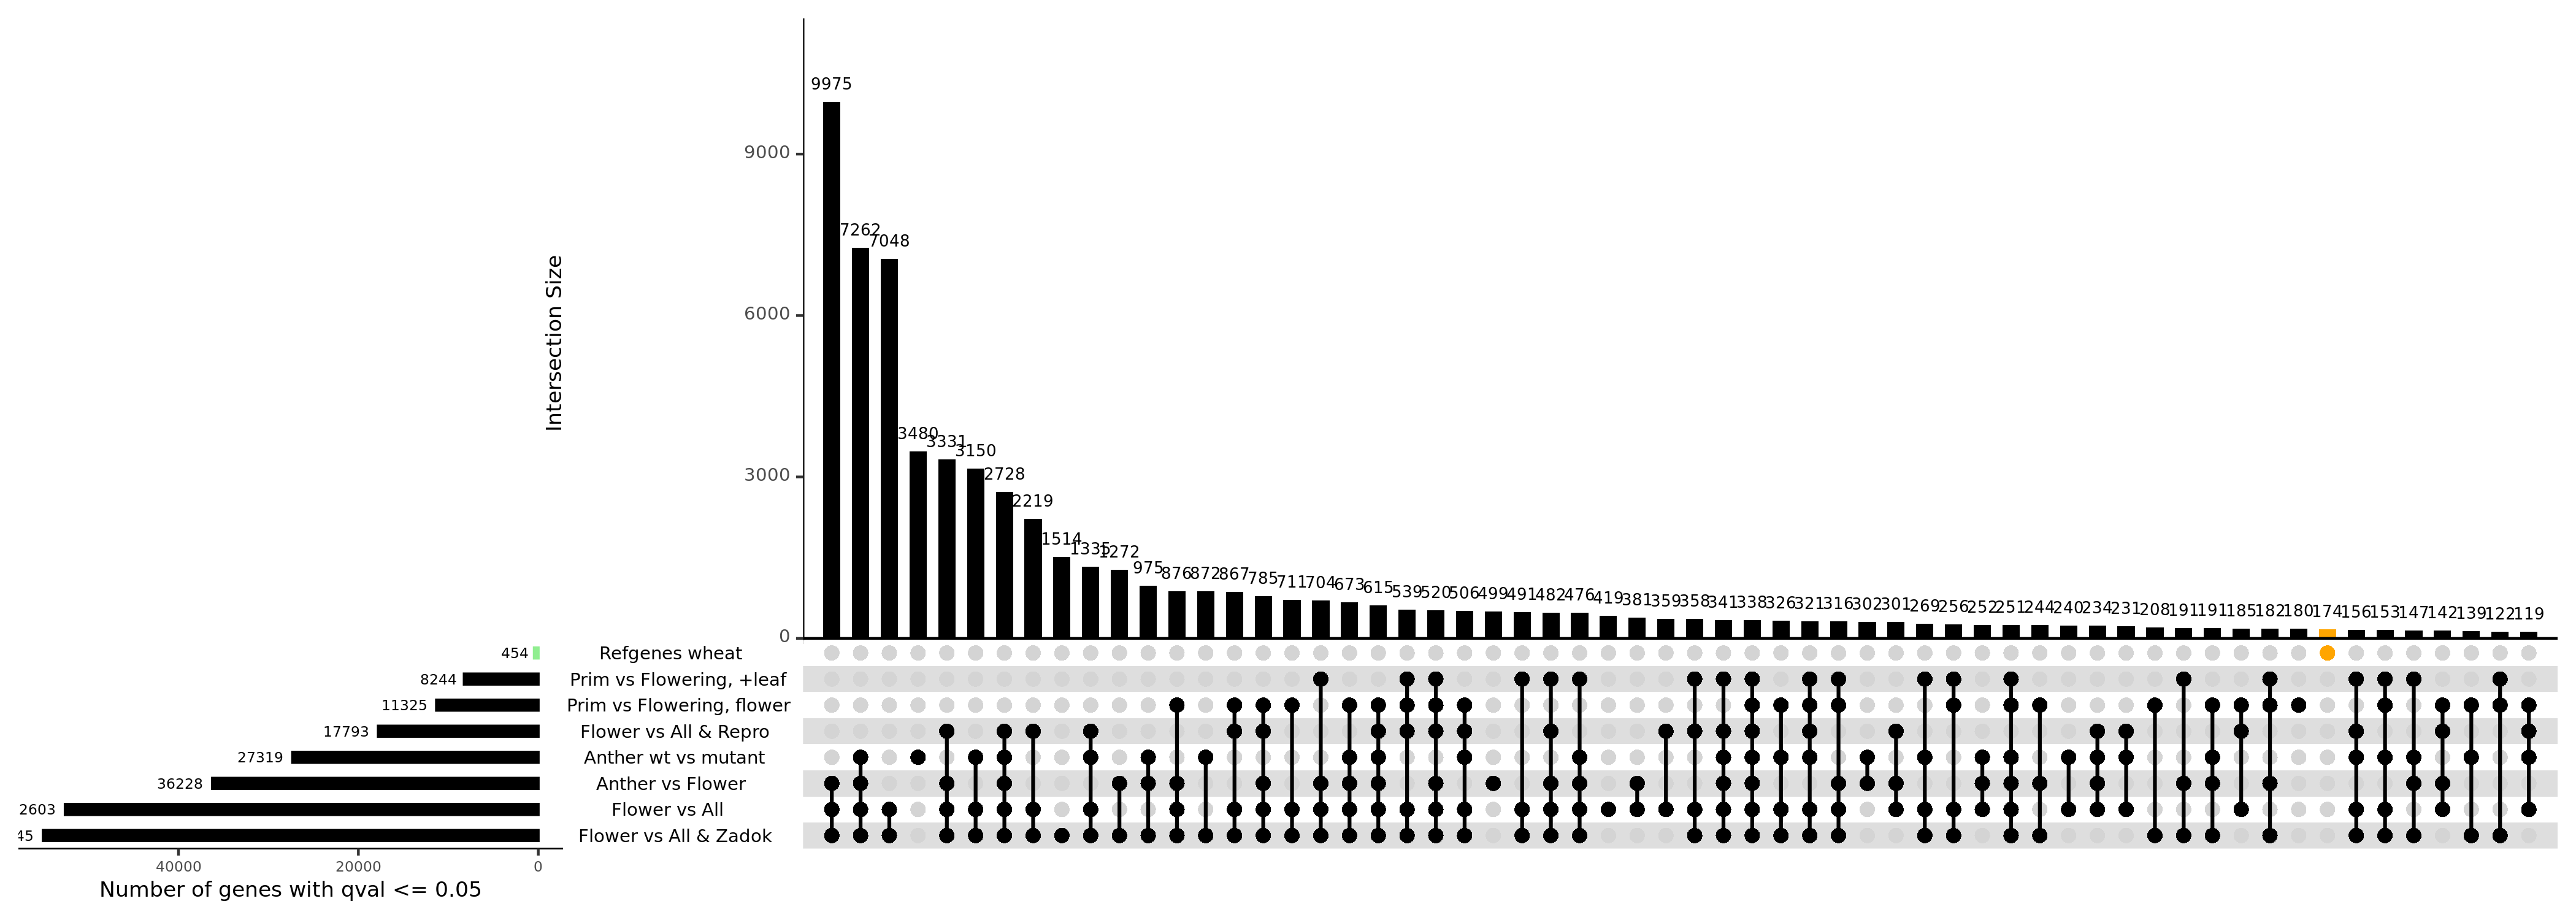

In [27]:
options(repr.plot.width = 14, repr.plot.height = 5, repr.plot.res = 300)
p2 <- upset(u_b_05, sets = c("Refgenes wheat", "Flower vs All & Repro", "Flower vs All", "Flower vs All & Zadok", "Prim vs Flowering, +leaf", "Prim vs Flowering, flower", "Anther vs Flower", "Anther wt vs mutant"), 
            nintersects = 60, order.by = "freq", main.bar.color = "black", matrix.color = "black", shade.color = "lightgrey", sets.bar.color =c("black", "black", "black", "black", "black", "black", "black", "lightgreen"),
            matrix.dot.alpha = 30, shade.alpha = 0.75, set_size.show = T, text.scale = c(1, 1, 1, 0.8, 1, 1), point.size = 2.5,
            queries = list(list(query = intersects, params = list("Refgenes wheat"), color = "orange", active = T)),
      mainbar.y.label = "Intersection Size", sets.x.label = "Number of genes with qval <= 0.05")
p2

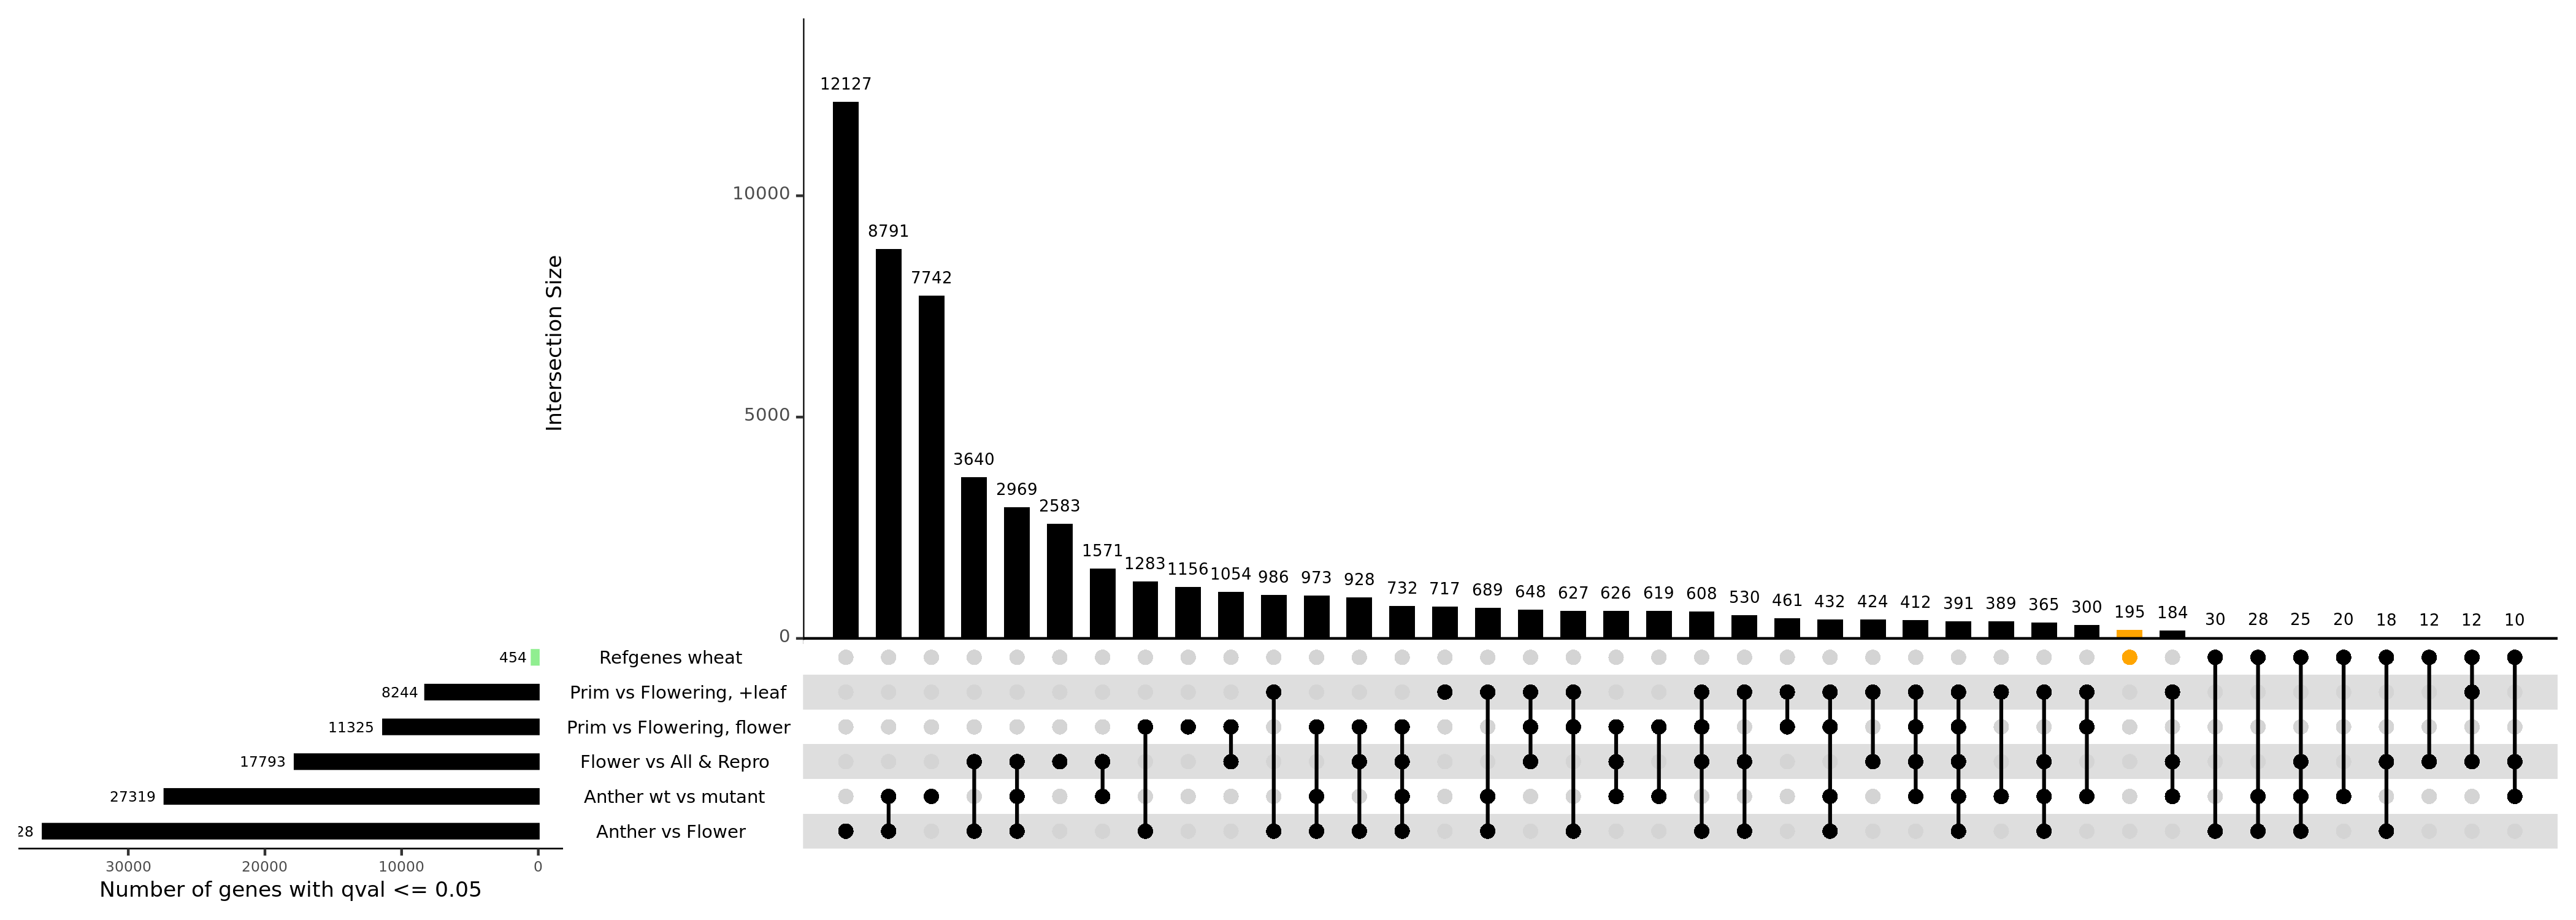

In [30]:
#display selected options
options(repr.plot.width = 14, repr.plot.height = 5, repr.plot.res = 300)
p22 <- upset(u_b_05, sets = c("Refgenes wheat", "Flower vs All & Repro", "Prim vs Flowering, +leaf", "Prim vs Flowering, flower", "Anther vs Flower", "Anther wt vs mutant"), nintersects = 40,
      order.by = "freq", main.bar.color = "black", matrix.color = "black", shade.color = "lightgrey", sets.bar.color =c("black", "black", "black", "black", "black", "lightgreen"), 
      matrix.dot.alpha = 30, shade.alpha = 0.75, set_size.show = T, text.scale = c(1, 1, 1, 0.8, 1, 1), point.size = 2.5,
      queries = list(list(query = intersects, params = list("Refgenes wheat"), color = "orange", active = T)),
      mainbar.y.label = "Intersection Size", sets.x.label = "Number of genes with qval <= 0.05")
p22

In [24]:
# build upset object for barley with qval <= 0.1
listInput_b <- list(ref_trit, id_f1_b_1, id_f2_b_1, id_f3_b_1, id_f4_b_1, id_f5_b_1, id_a1_b_1, id_a2_b_1)
u_b_1 <- fromList(listInput_b)
colnames(u_b_1) <- c("Refgenes wheat", "Flower vs All & Repro", "Flower vs All", "Flower vs All & Zadok", "Prim vs Flowering, +leaf", "Prim vs Flowering, flower", "Anther vs Flower", "Anther wt vs mutant")
str(u_b_1)

'data.frame':	65633 obs. of  8 variables:
 $ Refgenes wheat           : int  1 1 1 1 1 1 1 1 1 1 ...
 $ Flower vs All & Repro    : int  0 0 0 0 1 1 1 1 1 0 ...
 $ Flower vs All            : int  0 0 0 1 1 1 1 1 1 0 ...
 $ Flower vs All & Zadok    : int  0 0 0 1 1 1 1 1 1 0 ...
 $ Prim vs Flowering, +leaf : int  0 0 0 1 1 1 0 1 1 0 ...
 $ Prim vs Flowering, flower: int  0 0 0 1 0 0 0 0 0 0 ...
 $ Anther vs Flower         : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Anther wt vs mutant      : int  0 0 0 0 1 0 0 1 0 0 ...


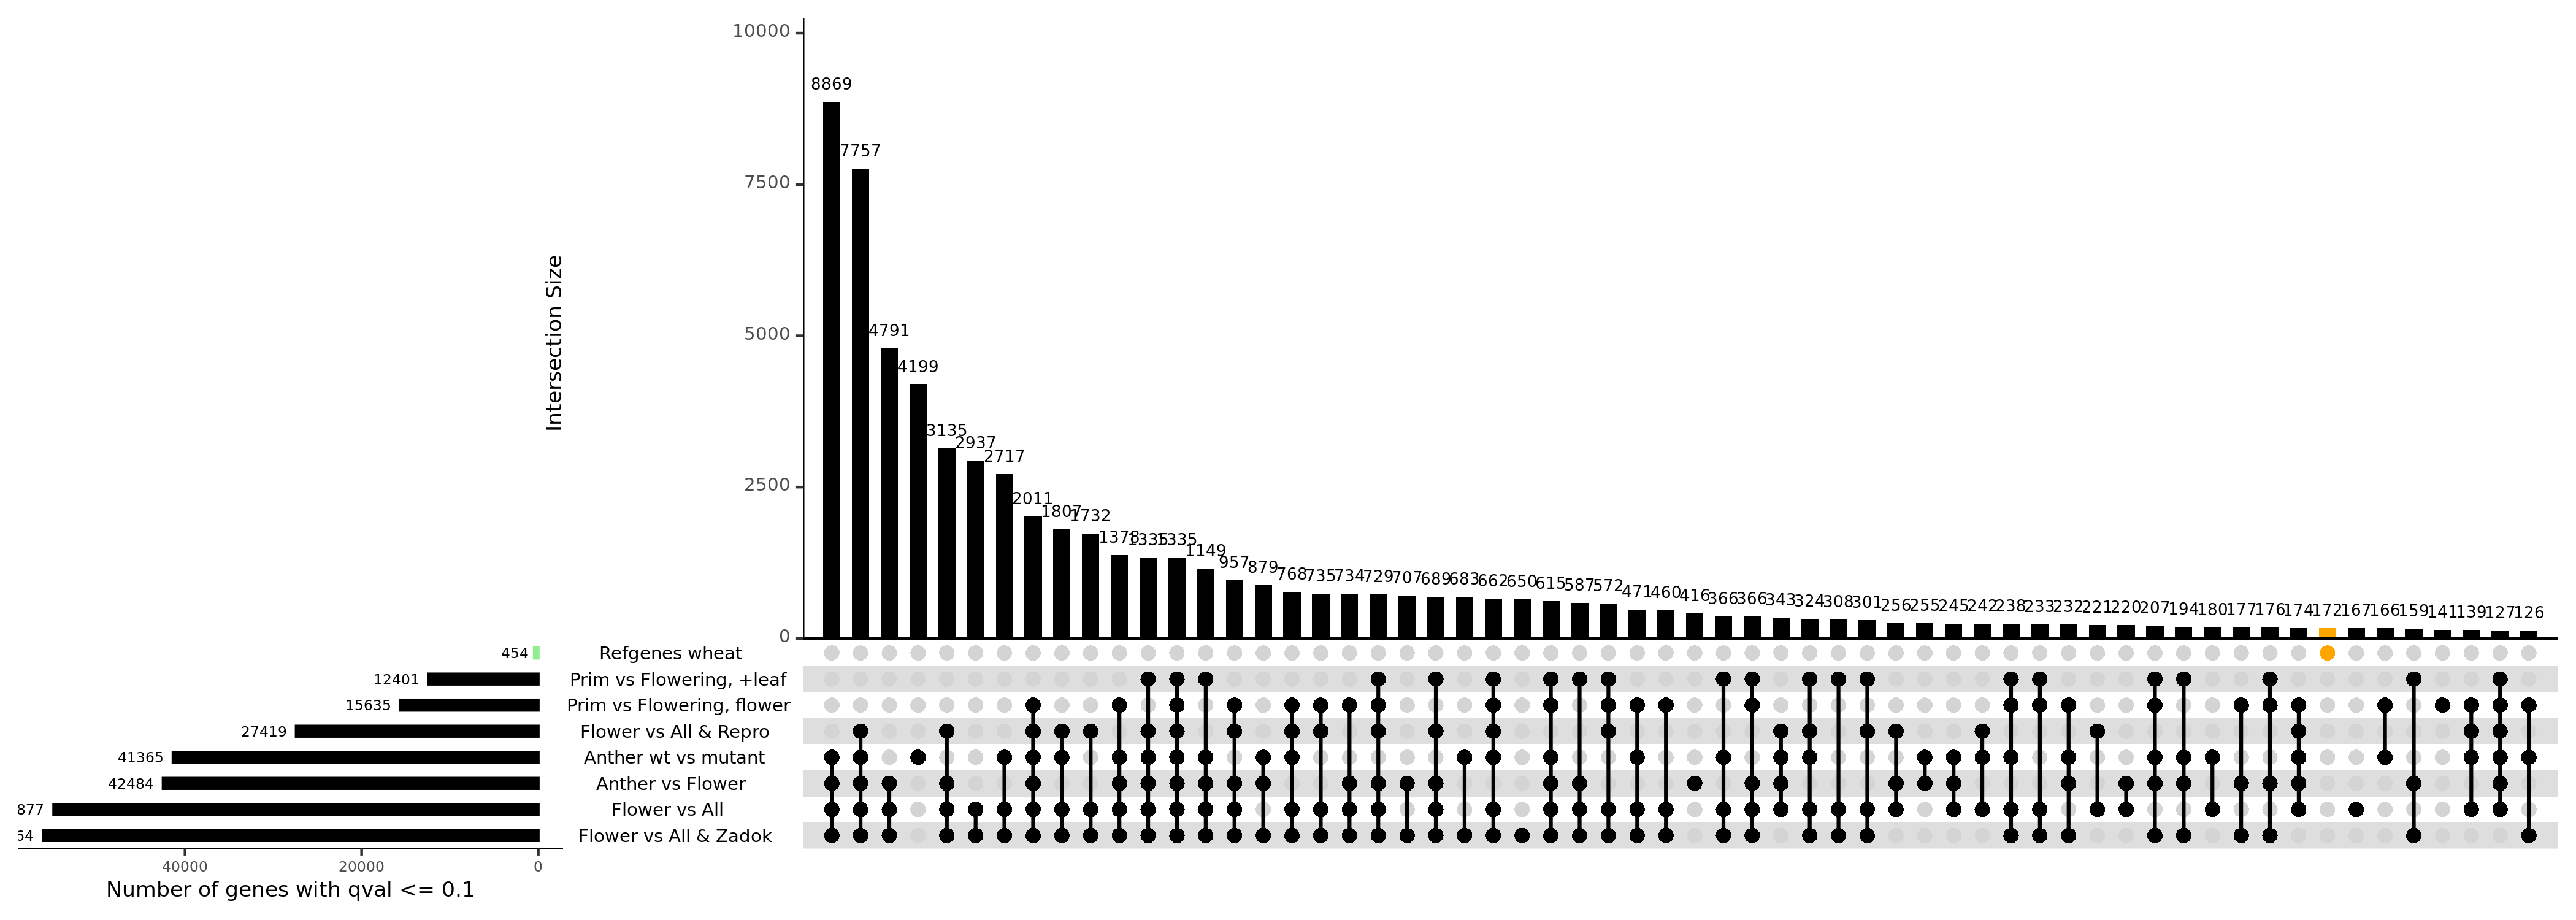

In [31]:
options(repr.plot.width = 14, repr.plot.height = 5, repr.plot.res = 300)
p3 <- upset(u_b_1, sets = c("Refgenes wheat", "Flower vs All & Repro", "Flower vs All", "Flower vs All & Zadok", "Prim vs Flowering, +leaf", "Prim vs Flowering, flower", "Anther vs Flower", "Anther wt vs mutant"), 
            nintersects = 60, order.by = "freq", main.bar.color = "black", matrix.color = "black", shade.color = "lightgrey", sets.bar.color =c("black", "black", "black", "black", "black", "black", "black", "lightgreen"),
            matrix.dot.alpha = 30, shade.alpha = 0.75, set_size.show = T, text.scale = c(1, 1, 1, 0.8, 1, 1), point.size = 2.5,
            queries = list(list(query = intersects, params = list("Refgenes wheat"), color = "orange", active = T)),
      mainbar.y.label = "Intersection Size", sets.x.label = "Number of genes with qval <= 0.1")
p3

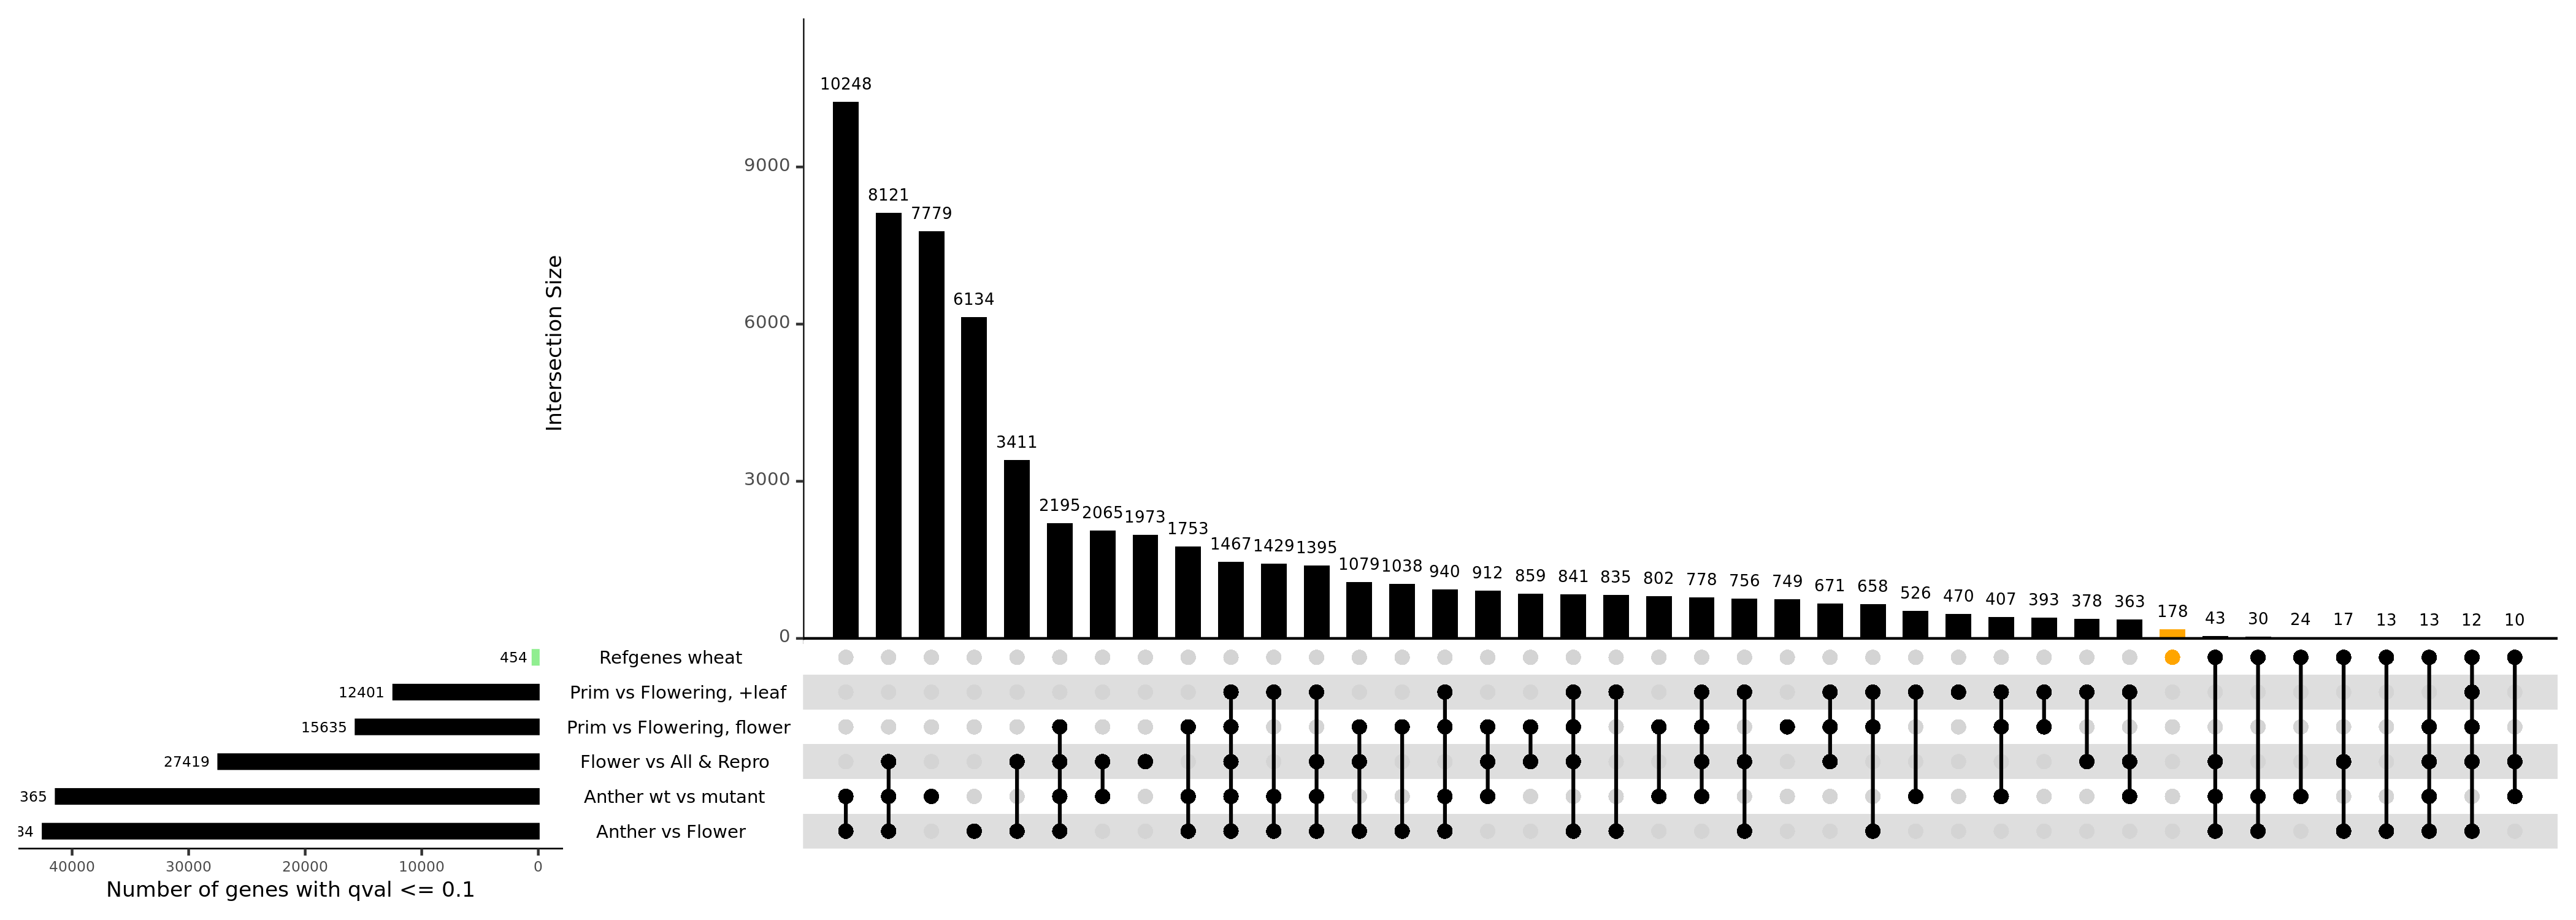

In [32]:
#display selected options
options(repr.plot.width = 14, repr.plot.height = 5, repr.plot.res = 300)
p33 <- upset(u_b_1, sets = c("Refgenes wheat", "Flower vs All & Repro", "Prim vs Flowering, +leaf", "Prim vs Flowering, flower", "Anther vs Flower", "Anther wt vs mutant"), nintersects = 40,
      order.by = "freq", main.bar.color = "black", matrix.color = "black", shade.color = "lightgrey", sets.bar.color =c("black", "black", "black", "black", "black", "lightgreen"), 
      matrix.dot.alpha = 30, shade.alpha = 0.75, set_size.show = T, text.scale = c(1, 1, 1, 0.8, 1, 1), point.size = 2.5,
      queries = list(list(query = intersects, params = list("Refgenes wheat"), color = "orange", active = T)),
      mainbar.y.label = "Intersection Size", sets.x.label = "Number of genes with qval <= 0.1")
p33

In [26]:
sessionInfo()

R version 3.6.3 (2020-02-29)
Platform: x86_64-conda_cos6-linux-gnu (64-bit)
Running under: CentOS Linux 7 (Core)

Matrix products: default
BLAS/LAPACK: /home/vanda.marosi/anaconda3/envs/r/lib/libopenblasp-r0.3.9.so

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=de_DE.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=de_DE.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=de_DE.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=de_DE.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
 [1] pheatmap_1.0.12    RColorBrewer_1.1-2 cowplot_1.0.0      forcats_0.5.0     
 [5] stringr_1.4.0      dplyr_0.8.5        purrr_0.3.4        readr_1.3.1       
 [9] tidyr_1.0.2        tibble_3.0.1       ggplot2_3.3.0      tidyverse_1.2.1   
[13] UpSetR_1.4.0      

loaded via a namespace (and n